In [5]:
import matplotlib.pyplot as plt

In [6]:
def create_image(rgb_img,h1,w1,h2,w2,ans):
    crop_img111 = "crop_img" + "041_" + ans
    crop_img1 = crop_img111 + ".png"
    crop_img11 = rgb_img[h1:h2, w1:w2]
    plt.figure()
    plt.imshow(crop_img11)
    #print(crop_img11.shape)
    cv2.imwrite(crop_img1, crop_img11)

In [7]:
import cv2


In [8]:
img = cv2.imread("./diaretdb1_v_1_1/resources/images/ddb1_fundusimages/image041.png")

In [9]:
#cv2.imshow('image',img)
b,g,r = cv2.split(img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])
r_img = cv2.merge([r])
# switch it to rgb

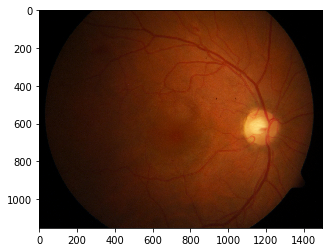

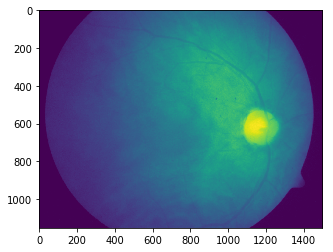

In [10]:
plt.figure()
plt.imshow(rgb_img)
plt.figure()
plt.imshow(r_img)

In [11]:
#img

In [12]:
h,w = r_img.shape
#print(h)
#print(w)

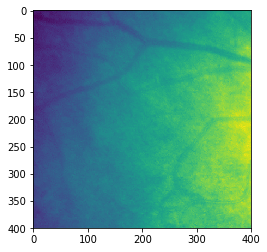

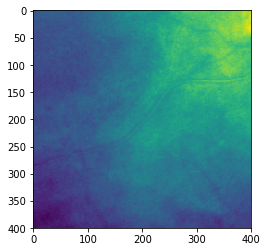

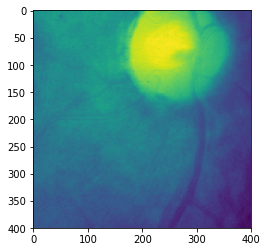

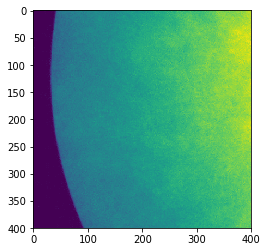

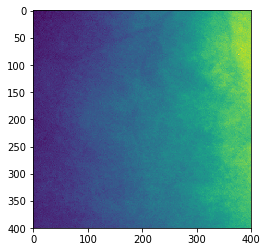

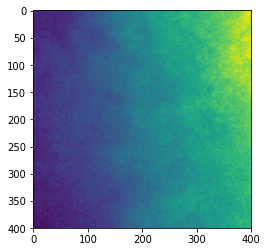

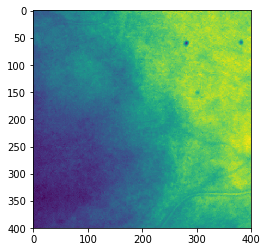

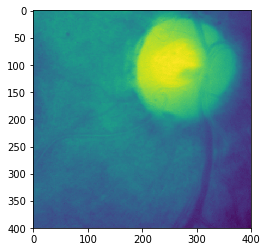

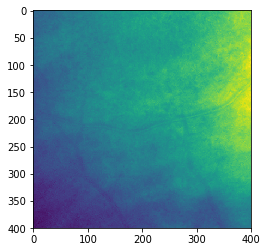

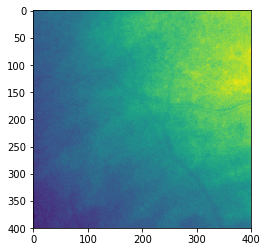

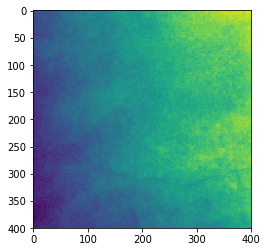

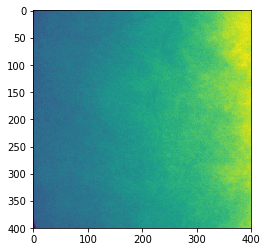

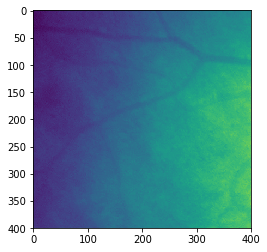

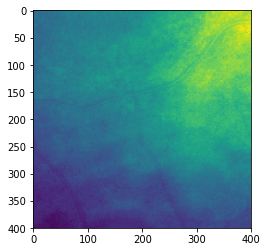

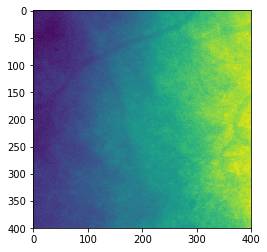

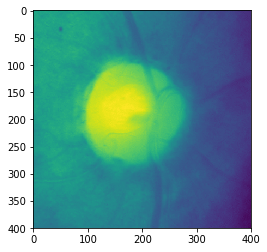

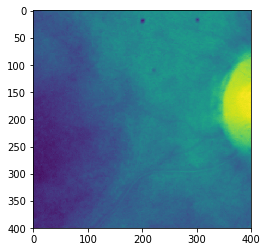

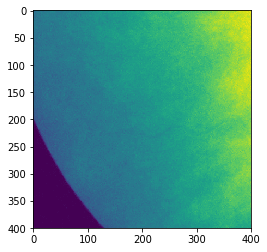

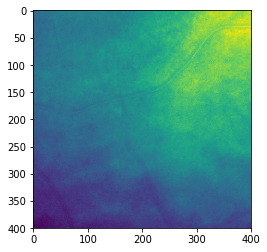

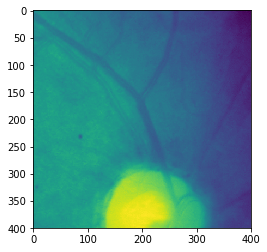

In [13]:
#generate 400x400 patch from the image
import random
for i in range(0,20):
    h1 = random.randrange(0, h-400)
    w1 = random.randrange(0, w-400)
    #print(h1)
    #print(w1)
    h2 = h1+400
    w2 = w1+400
    create_image(r_img,h1,w1,h2,w2,str(i))

In [265]:
import glob
import numpy as np

In [266]:
#Create numpy array of images
X = []
files = glob.glob ("./Image-Dataset/*.png")
# print(type(files))
files.sort()
# files = sorted(files)
for myFile in files:
#     print(myFile)
    image = cv2.imread (myFile,0)
    X.append (image)

X = np.array(X)
print('X_data shape:', X.shape)
print(len(X))

X_data shape: (212, 400, 400)
212


In [267]:
import scipy.io

In [268]:
y = []
for i in range(0,106):
    y.append('Yes')
for i in range(106,212):
    y.append('No')
    
y = np.asarray(y) 
#print(Y_data1.shape)

In [269]:
img_index = 25
#plt.imshow(X_data1[:,:,:,img_index])
#plt.show()
print(y[img_index])

Yes


In [270]:
print(len(X))
print(len(y))

212
212


In [271]:

from sklearn.utils import shuffle
# X = X.reshape(X.shape[0],X.shape[1]*X.shape[2]).T
# y = y.reshape(y.shape[0],)
X = np.reshape(X, [X.shape[0], X.shape[1]*X.shape[2]])

X, y = shuffle(X, y, random_state=42)


In [272]:
#############################   Random Forest Algorithm  ##############################

In [273]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [275]:
from sklearn.metrics import accuracy_score

preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.7906976744186046


In [276]:
print(preds)
pred_prob = clf.predict_proba(X_test)
#print(pred_prob)

['No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'Yes']


In [277]:
from sklearn.metrics import precision_recall_fscore_support

In [278]:
precision_recall_fscore_support(y_test, preds, average=None)

(array([0.86363636, 0.71428571]),
 array([0.76      , 0.83333333]),
 array([0.80851064, 0.76923077]),
 array([25, 18], dtype=int32))

In [279]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
print(f1_score(y_test, preds, average=None))

[0.80851064 0.76923077]


In [280]:
print(y_test)

['No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No']


In [281]:
for i in range(len(y_test)):
    if(y_test[i]=='No'):
        #print(y_test[i])
        num = int(0)
        #print(type(num))
        y_test[i]= int(num)
        #print(type(y_test[i]))
        #print(y_test[i])
    else:
        num = int(1)
        y_test[i]=int(num)
        #print(type(y_test[i]))
        
    if(preds[i]=='No'):
        num = int(0)
        preds[i]=int(num)
    else:
        num = int(1)
        preds[i]=int(num)

print(y_test)
print(preds)

['0' '1' '1' '0' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '1' '0' '0'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0'
 '1' '1' '0' '1' '0' '1' '0']
['0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0'
 '1' '1' '1' '1' '0' '0' '1']


In [282]:
y_test = list(map(int, y_test)) 
preds = list(map(int, preds)) 

In [283]:
print(roc_auc_score(y_test, preds))

0.7966666666666667


In [284]:
###############################  Neural Network Algorithm ##############################

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [286]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [287]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))
mlp.fit(X_train, y_train)

MemoryError: 

In [288]:
preds1 = mlp.predict(X_test)
print(preds1)

#preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds1))

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No']
Accuracy: 0.5348837209302325


In [291]:
#print(f1_score(y_test, preds, average=None))

In [292]:
################################## Support Vector Machine Algorithm ####################################

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [304]:
from sklearn.svm import SVC
svclassifier = SVC()

In [305]:
svl.fit(X_train,y_train)

MemoryError: 

In [306]:
preds2 = svl.predict(X_test)


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.